<a href="https://colab.research.google.com/github/KhushiBhadoria/Stock-Price-Prediction/blob/main/ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler

In [ ]:
file_input=input("Enter csv file..")
df=pd.read_csv(file_input)

MA

In [ ]:
def moving_average():
  sm_average_close=[]
  sm_average_open=[]
  for i in range(0,15):
    sm_average_close.append(0)
    sm_average_open.append(0)
  i=0
  while i<(df.index[-1]-14):
   j=i
   sum_close=0
   sum_open=0

   while j<15+i:
    sum_close=sum_close+df['Close'][j]
    sum_open=sum_open+df['Open'][j]
    j=j+1
   
   sm_average_close.append(sum_close/14)
   sm_average_open.append(sum_open/14)
   
   i=i+1
  return sm_average_close,sm_average_open




EMA

In [ ]:
def exponential_average():
  multiplier=2/(15+1)                                     #[2/(number of ovservation+1)]
  ex_average_close=[]
  ex_average_open=[]

  for i in range(0,15):
    ex_average_close.append(0)
    ex_average_open.append(0)
  i=0
  while i<(df.index[-1]-14):
   j=i
   while j<15+i:
    EMA_close=df['Close'][j]*multiplier+ex_average_close[j-1]*(1-multiplier)
    EMA_open=df['Open'][j]*multiplier+ex_average_open[j-1]*(1-multiplier)
    j=j+1
   ex_average_close.append(EMA_close)
   ex_average_open.append(EMA_open)
   
   i=i+1
  return ex_average_close,ex_average_open

KFold

In [ ]:
 def kfold(X,Y,s,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=s)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    acc=(r2_score(Y_test,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_test,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score


def kfold_(X,Y,s,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)

  acc_score=[]
  error_rmse=[]
  kf=KFold(n_splits=s)
  for train_index, test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    Y_train,Y_test=Y[train_index],Y[test_index]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_train)
    acc=(r2_score(Y_train,y_pred))*100
    acc_score.append(acc)
  avg_acc_score=sum(acc_score)/s
  error=np.sqrt(metrics.mean_squared_error(Y_train,y_pred))
  error_rmse.append(error)

  avg_rmse=sum(error_rmse)/s

  print('Average RMSE using KFold :{}'.format(avg_rmse))
  print('Average accuracy using KFold :{}'.format(avg_acc_score))
  return avg_rmse,avg_acc_score
  




Train Test Split

In [ ]:
def train_test(X,Y,size,model):
  Y=np.array(Y).astype(int)
  Y=np.ravel(Y)
  X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=size,random_state=10)
  regressor=model
  regressor.fit(X_train,Y_train)
  Y_pred_test=regressor.predict(X_test)
  Y_pred_train=regressor.predict(X_train)

  return Y_pred_test,Y_test,Y_train,Y_pred_train
  

Accuracy

In [ ]:
def accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  r_testing=(r2_score(Y_test,Y_pred_test))*100
  r_training=(r2_score(Y_train,Y_pred_train))*100
  print("Accuracy of training:",r_training)
  print("Accuracy of testing:",r_testing)
  return r_training,r_testing

Error

In [ ]:
 def error_function(Y_test,Y_pred_test,Y_train,Y_pred_train):
  rmse_training=np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train))
  rmse_testing=np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test))
  print('Root Mean Squared Error of training:',np.sqrt(metrics.mean_squared_error(Y_train,Y_pred_train)))
  print('Root Mean Squared Error of testing:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_test)))
  return rmse_training,rmse_testing



In [ ]:
df['Moving Average Close'],df['Moving Average Open']=moving_average()
df['EMA Close'],df['EMA Open']=exponential_average()

Fetch fixed interval data from dataset

In [ ]:
def interval_selection(interval,df):
 row_list=[]
 index=[]
 i=0
 while i <(df.index[-1]):
   row_list.append(i)

   i=i+interval
#print(row_list)
#print(index)
 df_new=df.iloc[row_list]
 index=np.arange(len(row_list))
 df_new=df_new.set_index(index)
 return df_new



In [ ]:
def predict_choose(df):
 if 'Date' in df.columns:
   df=df.drop('Date',axis=1)
 print("what you want to predict"+str(list(df)))
 choice=str(input('Enter your choice:'))
 Y=df.loc[:,choice]
 df_X=df.drop(choice,axis=1)
 X=df_X[list(df_X)]
 return X,Y
 


In [ ]:
interval_wise=int(input("Do you want to predict data interval wise.\n 1.Yes\n 2.No\n  "))
if interval_wise==1:
  interval=int(input("Enter interval: "))
  df_interval=interval_selection(interval,df)
  X,Y=predict_choose(df_interval)
else:
  X,Y=predict_choose(df)



Do you want to predict data interal wise.
 1.Yes
 2.No
  1
Enter interval: 4
what you want to predict['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'Moving Average Close', 'Moving Average Open', 'EMA Close', 'EMA Open']
Enter your choice:Close


In [ ]:
Algorithm=['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression']
Kfold_accuracy=[]
Kfold_error=[]
testing_accuracy=[]
testing_error=[]
training_accuracy=[]
training_error=[]

scaling

In [ ]:
Y_r=np.array(Y).reshape(-1,1)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler().fit_transform(X)
sc_Y=StandardScaler().fit_transform(Y_r)

SVR

In [ ]:
model=SVR(kernel='rbf')
rmse_svr_Kfold,accuracy_svr_Kfold=kfold_(sc_X,sc_Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,0.2,model)
r_training_svr,r_testing_svr=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_svr,rmse_testing_svr=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_svr_Kfold)
Kfold_error.append(rmse_svr_Kfold)
testing_accuracy.append(r_testing_svr)
testing_error.append(rmse_testing_svr)
training_accuracy.append(r_training_svr)
training_error.append(rmse_training_svr)


Average RMSE using KFold :0.012290960708211961
Average accuracy using KFold :94.81356155873591
Accuracy of training: 95.87930458208112
Accuracy of testing: 83.34755128995623
Root Mean Squared Error of training: 0.1409768778752872
Root Mean Squared Error of testing: 0.17677397872608405


Random Forest

In [ ]:
model=RandomForestRegressor(n_estimators=100,random_state=0)
rmse_random_Kfold,accuracy_random_Kfold=kfold(X,Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,0.2,model)
r_training_random,r_testing_random=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_random,rmse_testing_random=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_random_Kfold)
Kfold_error.append(rmse_random_Kfold)
testing_accuracy.append(r_testing_random)
testing_error.append(rmse_testing_random)
training_accuracy.append(r_training_random)
training_error.append(rmse_training_random)

Average RMSE using KFold :57.9991848994449
Average accuracy using KFold :55.733607974611274
Accuracy of training: 99.96644025039136
Accuracy of testing: 99.76622542297557
Root Mean Squared Error of training: 32.5957631274931
Root Mean Squared Error of testing: 73.38897704090923


Multiple Linear Regression

In [ ]:
model=LinearRegression()
rmse_multiple_Kfold,accuracy_multiple_Kfold=kfold(X,Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(X,Y,0.2,model)
r_training_multiple,r_testing_multiple=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_multiple,rmse_testing_multiple=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_multiple_Kfold)
Kfold_error.append(rmse_multiple_Kfold)
testing_accuracy.append(r_testing_multiple)
testing_error.append(rmse_testing_multiple)
training_accuracy.append(r_training_multiple)
training_error.append(rmse_training_multiple)

Average RMSE using KFold :0.027312792106441375
Average accuracy using KFold :99.9997159405687
Accuracy of training: 99.9999965863267
Accuracy of testing: 99.99999621564206
Root Mean Squared Error of training: 0.3287477389431344
Root Mean Squared Error of testing: 0.2952761015077774


KNN

In [ ]:
model=KNeighborsClassifier(n_neighbors=7)
rmse_knn_Kfold,accuracy_knn_Kfold=kfold_(sc_X,sc_Y,10,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,0.2,model)
r_training_knn,r_testing_knn=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_knn,rmse_testing_knn=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_knn_Kfold)
Kfold_error.append(rmse_knn_Kfold)
testing_accuracy.append(r_testing_knn)
testing_error.append(rmse_testing_knn)
training_accuracy.append(r_training_knn)
training_error.append(rmse_training_knn)


Average RMSE using KFold :0.015851065623706036
Average accuracy using KFold :92.4120337815555
Accuracy of training: 92.93172690763052
Accuracy of testing: 88.1578947368421
Root Mean Squared Error of training: 0.1846372364689991
Root Mean Squared Error of testing: 0.14907119849998599


Logistic Regression

In [ ]:
model=LogisticRegression(solver='liblinear')
rmse_logistic_Kfold,accuracy_logistic_Kfold=kfold_(sc_X,sc_Y,20,model)
Y_pred_test,Y_test,Y_train,Y_pred_train=train_test(sc_X,sc_Y,0.2,model)
r_training_logistic,r_testing_logistic=accuracy_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
rmse_training_logistic,rmse_testing_logistic=error_function(Y_test,Y_pred_test,Y_train,Y_pred_train)
Kfold_accuracy.append(accuracy_logistic_Kfold)
Kfold_error.append(rmse_logistic_Kfold)
testing_accuracy.append(r_testing_logistic)
testing_error.append(rmse_testing_logistic)
training_accuracy.append(r_training_logistic)
training_error.append(rmse_training_logistic)

Average RMSE using KFold :0.017593288763724922
Average accuracy using KFold :66.25061545008161
Accuracy of training: 67.01472556894244
Accuracy of testing: 40.78947368421052
Root Mean Squared Error of training: 0.3988620176087328
Root Mean Squared Error of testing: 0.3333333333333333


Create Csv

In [ ]:
df_table=pd.DataFrame({'Algorithm':['SVR','Random Forest','Multiple Regression','KNN','LogisticRegression'],'KFold_Accuracy':Kfold_accuracy,'KFold Error':Kfold_error,'Training_Accuracy':training_accuracy,
                        'Traning Error':training_error,'Testing_Accuracy':testing_accuracy,'Testing Error':testing_error})
print(df_table)
df_table.to_csv("Algorithm Analysis.csv")

             Algorithm  KFold_Accuracy  ...  Testing_Accuracy  Testing Error
0                  SVR       94.813562  ...         83.347551       0.176774
1        Random Forest       55.733608  ...         99.766225      73.388977
2  Multiple Regression       99.999716  ...         99.999996       0.295276
3                  KNN       92.412034  ...         88.157895       0.149071
4   LogisticRegression       66.250615  ...         40.789474       0.333333

[5 rows x 7 columns]


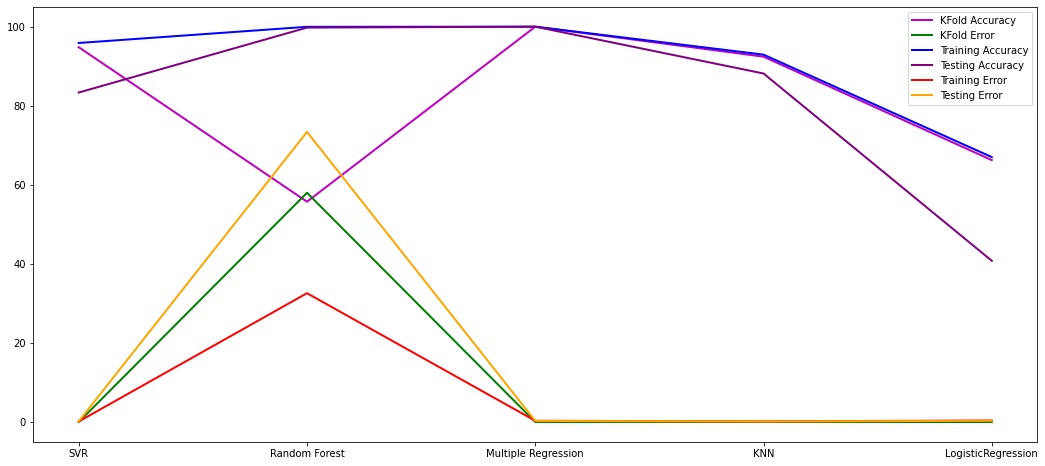

In [ ]:

plt.figure(figsize=(18,8))
plt.plot(Algorithm,Kfold_accuracy,color='m',linewidth=2,label='KFold Accuracy')
plt.plot(Algorithm,Kfold_error,color='green',linewidth=2,label='KFold Error')
plt.plot(Algorithm,training_accuracy,color='blue',linewidth=2,label='Training Accuracy')
plt.plot(Algorithm,testing_accuracy,color='purple',linewidth=2,label='Testing Accuracy')
plt.plot(Algorithm,training_error,color='red',linewidth=2,label='Training Error')
plt.plot(Algorithm,testing_error,color='orange',linewidth=2,label='Testing Error')
plt.legend()


In [ ]:
print("Sort your list by"+str(list(df_table)))
s=str(input('Enter your choice:'))
sorted_df=df_table.sort_values(s,ascending=False,axis=0)
print(sorted_df)


Sort your list by['Algorithm', 'KFold_Accuracy', 'KFold Error', 'Training_Accuracy', 'Traning Error', 'Testing_Accuracy', 'Testing Error']
Enter your choice:KFold_Accuracy
             Algorithm  KFold_Accuracy  ...  Testing_Accuracy  Testing Error
2  Multiple Regression       99.999716  ...         99.999996       0.295276
0                  SVR       94.813562  ...         83.347551       0.176774
3                  KNN       92.412034  ...         88.157895       0.149071
4   LogisticRegression       66.250615  ...         40.789474       0.333333
1        Random Forest       55.733608  ...         99.766225      73.388977

[5 rows x 7 columns]


In [ ]:
df_best_algo=sorted_df.iloc[0:3]
print(df_best_algo)


             Algorithm  KFold_Accuracy  ...  Testing_Accuracy  Testing Error
2  Multiple Regression       99.999716  ...         99.999996       0.295276
0                  SVR       94.813562  ...         83.347551       0.176774
3                  KNN       92.412034  ...         88.157895       0.149071

[3 rows x 7 columns]
